# UK Used Car Data set

- year (Año del vehículo)
- price (Precio del vehículo)
- mileage (Kilometraje)
- tax (Impuestos del vehículo) : La cantidad que se paga como impuesto anual por el vehículo.
- mpg (Rendimiento en millas por galón) : Valores altos indican que el vehículo consume menos combustible por distancia recorrida.
- engineSize (Tamaño del motor)

In [31]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [32]:
    # 1. Cargar el dataset
    df = pd.read_csv("./datasets/ford.csv")  # Cambia por la ruta correspondiente

In [33]:
df.info()
df.head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17965 entries, 0 to 17964
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17965 non-null  object 
 1   year          17965 non-null  int64  
 2   price         17965 non-null  int64  
 3   transmission  17965 non-null  object 
 4   mileage       17965 non-null  int64  
 5   fuelType      17965 non-null  object 
 6   tax           17965 non-null  int64  
 7   mpg           17965 non-null  float64
 8   engineSize    17965 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


<bound method NDFrame.head of          model  year  price transmission  mileage fuelType  tax   mpg  \
0       Fiesta  2017  12000    Automatic    15944   Petrol  150  57.7   
1        Focus  2018  14000       Manual     9083   Petrol  150  57.7   
2        Focus  2017  13000       Manual    12456   Petrol  150  57.7   
3       Fiesta  2019  17500       Manual    10460   Petrol  145  40.3   
4       Fiesta  2019  16500    Automatic     1482   Petrol  145  48.7   
...        ...   ...    ...          ...      ...      ...  ...   ...   
17960   Fiesta  2016   7999       Manual    31348   Petrol  125  54.3   
17961    B-MAX  2017   8999       Manual    16700   Petrol  150  47.1   
17962    B-MAX  2014   7499       Manual    40700   Petrol   30  57.7   
17963    Focus  2015   9999       Manual     7010   Diesel   20  67.3   
17964       KA  2018   8299       Manual     5007   Petrol  145  57.7   

       engineSize  
0             1.0  
1             1.0  
2             1.0  
3            

In [34]:
df["transmission"].value_counts()

transmission
Manual       15517
Automatic     1361
Semi-Auto     1087
Name: count, dtype: int64

In [35]:
# 2. Generar variables dummies para la columna 'transmission'
df_dummies = pd.get_dummies(df, columns=['transmission'])

df_dummies

,model,year,price,mileage,fuelType,tax,mpg,engineSize,transmission_Automatic,transmission_Manual,transmission_Semi-Auto
0,Fiesta,2017,12000,15944,Petrol,150,57.7,1.0,True,False,False
1,Focus,2018,14000,9083,Petrol,150,57.7,1.0,False,True,False
2,Focus,2017,13000,12456,Petrol,150,57.7,1.0,False,True,False
3,Fiesta,2019,17500,10460,Petrol,145,40.3,1.5,False,True,False
4,Fiesta,2019,16500,1482,Petrol,145,48.7,1.0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
17960,Fiesta,2016,7999,31348,Petrol,125,54.3,1.2,False,True,False
17961,B-MAX,2017,8999,16700,Petrol,150,47.1,1.4,False,True,False
17962,B-MAX,2014,7499,40700,Petrol,30,57.7,1.0,False,True,False
17963,Focus,2015,9999,7010,Diesel,20,67.3,1.6,False,True,False


In [36]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17965 entries, 0 to 17964
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   model                   17965 non-null  object 
 1   year                    17965 non-null  int64  
 2   price                   17965 non-null  int64  
 3   mileage                 17965 non-null  int64  
 4   fuelType                17965 non-null  object 
 5   tax                     17965 non-null  int64  
 6   mpg                     17965 non-null  float64
 7   engineSize              17965 non-null  float64
 8   transmission_Automatic  17965 non-null  bool   
 9   transmission_Manual     17965 non-null  bool   
 10  transmission_Semi-Auto  17965 non-null  bool   
dtypes: bool(3), float64(2), int64(4), object(2)
memory usage: 1.1+ MB


In [37]:
# Convertir las columnas dummies a tipo numérico (0 y 1)
for col in df_dummies.columns:
    if df_dummies[col].dtype == 'bool':  # Detectar columnas booleanas
        df_dummies[col] = df_dummies[col].astype(int)  # Convertir a entero (0/1)

In [38]:
#confirmo si se ha hecho el cambio
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17965 entries, 0 to 17964
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   model                   17965 non-null  object 
 1   year                    17965 non-null  int64  
 2   price                   17965 non-null  int64  
 3   mileage                 17965 non-null  int64  
 4   fuelType                17965 non-null  object 
 5   tax                     17965 non-null  int64  
 6   mpg                     17965 non-null  float64
 7   engineSize              17965 non-null  float64
 8   transmission_Automatic  17965 non-null  int64  
 9   transmission_Manual     17965 non-null  int64  
 10  transmission_Semi-Auto  17965 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 1.5+ MB


In [39]:
# 3. Seleccionar columnas numéricas
# Seleccionamos solo las columnas numéricas
numeric_cols = df_dummies.select_dtypes(include=["float64", "int64"]).columns
numeric_cols 

Index(['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize',
       'transmission_Automatic', 'transmission_Manual',
       'transmission_Semi-Auto'],
      dtype='object')

<Figure size 1000x800 with 0 Axes>

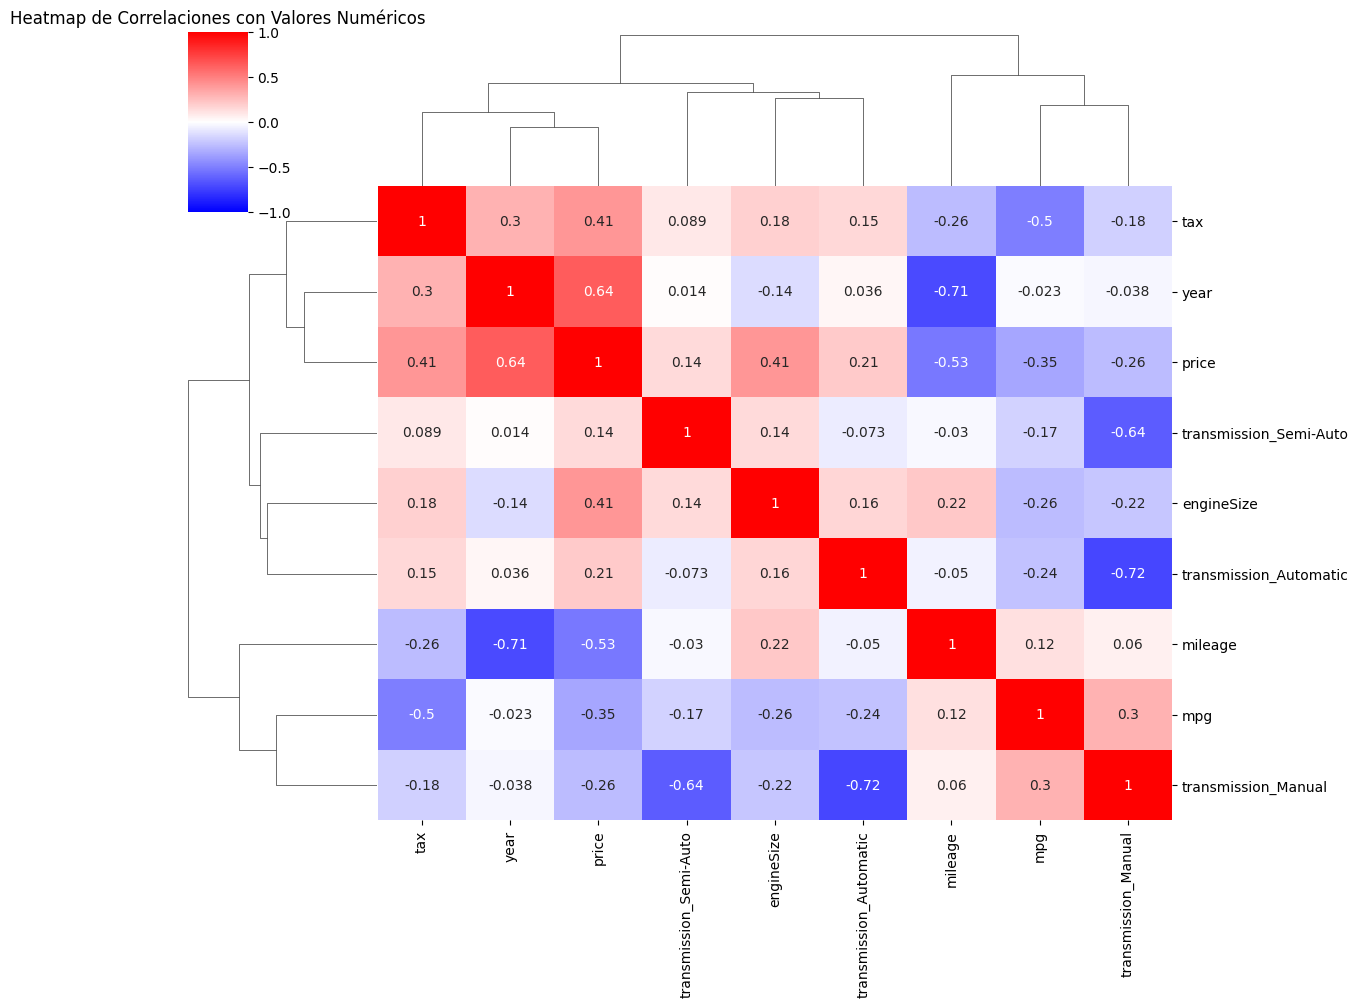

In [40]:
# Crear un heatmap de correlación
plt.figure(figsize=(10, 8))
sns.clustermap(df_dummies[numeric_cols].corr(), annot=True, cmap="bwr", vmin=-1, vmax=1, figsize=(12, 10))
plt.title("Heatmap de Correlaciones con Valores Numéricos")
plt.show()

- mileage y year:
    -Correlación negativa fuerte (~ -0.71). Vehículos más nuevos (year más alto) tienden a tener menos kilometraje (mileage más bajo).

- price y year:
    - Correlación positiva moderada (~ 0.64). Vehículos más nuevos tienden a ser más caros.


- transmission_Manual y transmission_Automatic:
    - Correlación negativa fuerte (~ -0.72). Esto es esperado, ya que son categorías excluyentes (un vehículo no puede ser manual y automático a la vez).

- engineSize:
    - Baja correlación con otras variables. Esto sugiere que el tamaño del motor tiene un comportamiento independiente respecto a las otras características.


- price y mileage:
    - Correlación negativa moderada (~ -0.53). Vehículos con mayor kilometraje tienden a tener precios más bajos.


In [41]:
# 4. Escalar las variables seleccionadas.Normalizar los datos de todas las columnas numericas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_dummies[numeric_cols])

In [42]:
# Mostrar los datos normalizados
print("\nDatos normalizados (primeras filas):")
print(X_scaled[:5])


Datos normalizados (primeras filas):
[[ 0.06507674 -0.05900477 -0.38104937  0.59129531 -0.02044219 -0.81142366
   3.4928288  -2.51766634 -0.25377818]
 [ 0.55281294  0.36282486 -0.7334092   0.59129531 -0.02044219 -0.81142366
  -0.28630089  0.39719322 -0.25377818]
 [ 0.06507674  0.15191004 -0.56018231  0.59129531 -0.02044219 -0.81142366
  -0.28630089  0.39719322 -0.25377818]
 [ 1.04054913  1.10102671 -0.66269072  0.51066148 -1.73884265  0.34502178
  -0.28630089  0.39719322 -0.25377818]
 [ 1.04054913  0.89011189 -1.12377314  0.51066148 -0.90927001 -0.81142366
   3.4928288  -2.51766634 -0.25377818]]


In [43]:
X_scaled.shape  #numero de filas y columnas usamos las columnas indicvar las  las componentes.

(17965, 9)

In [44]:
X_scaled.shape[1]#las columnasm    X_scaled.shape[0]#las filas 

9

In [45]:
# 5. Aplicar PCA.# Creamos un modelo PCA (Análisis de Componentes Principales)
pca = PCA(n_components=X_scaled.shape[1])  # Mantener todas las componentes de columna numerica
X_pca = pca.fit_transform(X_scaled)#fit_transform ajusta el modelo PCA a los datos escalados y luego transforma estos datos a las nuevas componentes principales.
#X_pca contendrá los datos transformados en el espacio de las componentes principales.

In [46]:
X_pca

array([[ 2.03565349e+00, -1.55957537e+00, -2.07790571e+00, ...,
        -1.49354331e-01,  1.57562898e-01, -1.23202245e-15],
       [ 3.71485640e-01,  1.30982121e+00, -3.75863230e-02, ...,
        -2.40994896e-02,  2.76197014e-01, -2.88332882e-16],
       [ 5.24023371e-02,  9.45150691e-01,  4.97730789e-02, ...,
        -1.99767907e-01,  4.07178726e-01, -2.60577306e-16],
       ...,
       [-2.17170458e+00, -7.96183781e-01, -2.67883085e-01, ...,
         1.18529236e-01,  3.64227269e-01, -1.07771254e-17],
       [-1.30126080e+00,  8.26311928e-02, -3.81250926e-01, ...,
        -1.32877180e+00, -1.05624298e-01, -4.82621911e-16],
       [-6.77051661e-02,  1.02882261e+00, -7.86166724e-02, ...,
        -5.51843432e-01, -7.85445622e-01, -9.82222272e-16]])

In [47]:
# 6. Visualización de los pesos, genero un dataframe con pca
loadings_PCA = pd.DataFrame(
    pca.components_,
    columns=numeric_cols,
    index=[f'PCA{i+1}' for i in range(X_scaled.shape[1])]#hasta el numero de columnas
)

print("\nPesos de las variables originales en las componentes principales:")
loadings_PCA


Pesos de las variables originales en las componentes principales:


,year,price,mileage,tax,mpg,engineSize,transmission_Automatic,transmission_Manual,transmission_Semi-Auto
PCA1,3.341575e-01,4.753457e-01,-3.223815e-01,3.699989e-01,-3.433051e-01,2.047804e-01,0.282845,-0.367890,0.215449
PCA2,4.963634e-01,1.891721e-01,-4.772753e-01,5.336161e-02,1.763623e-01,-3.224081e-01,-0.299975,0.427358,-0.282007
PCA3,-1.683170e-01,1.589002e-01,2.238654e-01,3.639388e-01,-3.668051e-01,4.890913e-01,-0.225707,0.439572,-0.382007
PCA4,4.899521e-03,5.598262e-02,1.173236e-02,2.166182e-02,-2.680129e-02,1.191813e-01,-0.698814,0.052408,0.700161
PCA5,1.512487e-01,3.888721e-01,4.758361e-02,-4.620206e-01,4.987502e-01,5.968410e-01,0.045974,0.003114,-0.055504
PCA6,1.397767e-01,-1.272579e-01,2.613489e-01,6.983606e-01,6.306386e-01,4.180132e-02,0.043498,-0.067391,0.048694
PCA7,5.278464e-01,2.153583e-01,7.343181e-01,-1.422933e-01,-2.015396e-01,-2.735751e-01,-0.006900,0.003304,0.002904
PCA8,-5.408992e-01,7.043307e-01,9.074432e-02,7.690755e-02,1.694068e-01,-4.097482e-01,-0.019271,0.015263,-0.000575
PCA9,-1.955395e-16,3.888208e-16,1.694387e-16,-8.430115e-17,2.565707e-16,-3.882949e-16,0.535074,0.693727,0.482119


In [48]:
loadings = pd.DataFrame(
    pca.components_,
    columns=numeric_cols
)

print("\nPesos de las variables originales en las componentes principales:")
loadings


Pesos de las variables originales en las componentes principales:


,year,price,mileage,tax,mpg,engineSize,transmission_Automatic,transmission_Manual,transmission_Semi-Auto
0,3.341575e-01,4.753457e-01,-3.223815e-01,3.699989e-01,-3.433051e-01,2.047804e-01,0.282845,-0.367890,0.215449
1,4.963634e-01,1.891721e-01,-4.772753e-01,5.336161e-02,1.763623e-01,-3.224081e-01,-0.299975,0.427358,-0.282007
2,-1.683170e-01,1.589002e-01,2.238654e-01,3.639388e-01,-3.668051e-01,4.890913e-01,-0.225707,0.439572,-0.382007
3,4.899521e-03,5.598262e-02,1.173236e-02,2.166182e-02,-2.680129e-02,1.191813e-01,-0.698814,0.052408,0.700161
4,1.512487e-01,3.888721e-01,4.758361e-02,-4.620206e-01,4.987502e-01,5.968410e-01,0.045974,0.003114,-0.055504
5,1.397767e-01,-1.272579e-01,2.613489e-01,6.983606e-01,6.306386e-01,4.180132e-02,0.043498,-0.067391,0.048694
6,5.278464e-01,2.153583e-01,7.343181e-01,-1.422933e-01,-2.015396e-01,-2.735751e-01,-0.006900,0.003304,0.002904
7,-5.408992e-01,7.043307e-01,9.074432e-02,7.690755e-02,1.694068e-01,-4.097482e-01,-0.019271,0.015263,-0.000575
8,-1.955395e-16,3.888208e-16,1.694387e-16,-8.430115e-17,2.565707e-16,-3.882949e-16,0.535074,0.693727,0.482119


# **Interpretación de los pesos de las variables originales en las componentes principales**

Cada fila corresponde a una **componente principal (PCA)** y cada columna muestra el peso (*loading*) de una variable original en esa componente. Los pesos indican qué tan importante es cada variable para esa componente y si su influencia es positiva o negativa.

---

## **Análisis de cada componente**

### **PCA1 (Primera componente principal)**
| Variable                  | Peso           | Interpretación                                              |
|---------------------------|----------------|------------------------------------------------------------|
| `year`                   | **0.334158**  | Vehículos más antiguos tienen valores más altos en PCA1.   |
| `price`                  | **0.475346**  | Vehículos más baratos también tienen valores altos.         |
| `mileage`                | **-0.322381**   | Vehículos con mayor kilometraje están positivamente correlacionados. |
| `Tax `                   | **0.369999**   |   impuestos. |
| `mpg `                   | **-0.343305**   |   . |
| `engineSize`             | **0.204780**   | Contribución insignificante del tamaño del motor.          |
| `transmission_Automatic` | **0.282845**  | Transmisión automática contribuye negativamente.           |
| `transmission_Manual`    | **-0.367890**   | Transmisión manual contribuye positivamente.               |
| `transmission_Semi-Auto` | **0.215449**  | Transmisión semi-automática tiene muy poca influencia.      |

**Interpretación**:  
PCA1 parece capturar una combinación de **antigüedad, precio y kilometraje**:  
- **Vehículos más antiguos, más baratos y con mayor kilometraje** tienen valores más altos en PCA1.
- Las transmisiones juegan un papel menor, pero los vehículos manuales tienen una ligera correlación positiva.

---
0.496363	0.189172	-0.477275	0.053362	0.176362	-0.322408	-0.299975	0.427358	-0.282007
### **PCA2 (Segunda componente principal)**
| Variable                  | Peso           | Interpretación                                              |
|---------------------------|----------------|------------------------------------------------------------|
| `year`                   | **0.496363**   | Vehículos más nuevos contribuyen ligeramente a PCA2.       |
| `price`                  | **0.189172**   | Precio tiene una pequeña influencia positiva.              |
| `mileage`                | **-0.477275**  | Vehículos con menos kilometraje tienen valores más altos.  |
| `Tax `                   | **0.053362**   |   impuestos. |
| `mpg `                   | **0.176362**   |   . |
| `engineSize`             | **-0.322408**  | Tamaño del motor contribuye negativamente.                 |
| `transmission_Automatic` | **-0.299975**  | Transmisión automática reduce los valores en PCA2.         |
| `transmission_Manual`    | **0.427358**   | Transmisión manual aumenta los valores en PCA2.            |
| `transmission_Semi-Auto` | **-0.282007**  | Transmisión semi-automática tiene una influencia negativa. |

**Interpretación**:  
PCA2 parece capturar principalmente la **diferencia entre transmisiones**:  


---

### **PCA3 (Tercera componente principal)**
-0.168317	0.158900	0.223865	0.363939	-0.366805	0.489091	-0.225707	0.439572	-0.382007
| Variable                  | Peso           | Interpretación                                              |
|---------------------------|----------------|------------------------------------------------------------|
| `year`                   | **-0.168317**  | Año contribuye ligeramente de forma negativa.              |
| `price`                  | **0.158900**   | Precio tiene una influencia moderada positiva.             |
| `mileage`                | **0.223865**   | Kilometraje contribuye positivamente.                      |
| `Tax `                   | **0.363939**   |   impuestos. |
| `mpg `                   | **-0.366805**   |   . |
| `engineSize`             | **0.489091**   | Tamaño del motor domina esta componente.                   |
| `transmission_Automatic` | **-0.225707**   | Transmisión automática tiene una influencia pequeña.        |
| `transmission_Manual`    | **0.439572**   | Transmisión manual tiene una influencia mínima.            |
| `transmission_Semi-Auto` | **-0.382007**  | Transmisión semi-automática tiene un peso moderado negativo.|

**Interpretación**:  
PCA3 está dominada por el **tamaño del motor (`engineSize`)**:  
- Vehículos con motores más grandes tienen valores altos en PCA3.

---

### **PCA4 (Cuarta componente principal)*

**Interpretación**:  
PCA4 está dominada por **transmisión semi-automática** y también influye el **tamaño del motor**.

---

### **PCA5 y PCA6**
- **PCA5**:  
  Está dominada por **kilometraje (`mileage`, 0.776198)** y **año (`year`, 0.601956)**.  
  Representa un eje relacionado con **antigüedad y uso** del vehículo.

- **PCA6**:  
  Está dominada por **precio (`price`, 0.742535)** y **kilometraje (`mileage`, 0.208532)**.  
  Representa información residual.



Los pesos en  **PCA7****PCA8** y **PCA9**muestran valores pequeños en las variables originales. Sin embargo, los pesos son altos en las categorías de transmisión (`transmission_Automatic`, `transmission_Manual`, y `transmission_Semi-Auto`), indicando que esta componente captura exclusivamente las diferencias entre tipos de transmisión, aunque con menos relevancia.

---
1. **PCA1**:
   - Captura una combinación de características relacionadas con **estado general** del vehículo: precio, kilometraje y año.
2. **PCA2**:
   - Está dominada por el **tipo de transmisión**.
3. **PCA3**:
   - Representa principalmente el **tamaño del motor**.
4. **PCA4**:
   - Está relacionada con **transmisión semi-automática** y el tamaño del motor.
5. **PCA5** y **PCA6**:
   - Capturan inf
   
   El resto son residuales. 



In [49]:
# 6. Visualizar varianza explicada   pca.explained_variance_ratio_ 


# PCA1: 0.32657452 → 32,65% de la varianza total.
# La primera componente principal explica la mayor parte de la variabilidad en los datos.

# PCA2: 0.21928763 → 21.92% de la varianza total.
# La segunda componente principal explica una parte significativa, pero menor que la primera.

# PCA3: 0.13605511 → 13.60% de la varianza total.
# La tercera componente sigue aportando información relevante.

#PCA4: 0.1187778  → 11.87% de la varianza total.
#La cuarta componente aporta algo de información, pero mucho menos que las primeras tres.

#PCA5: 0.09868705 → 9.86% de la varianza total.
#La quinta componente captura muy poca información.

#PCA6: 0.0531467  → 5.31% de la varianza total.
#La sexta  componente aporta información mínima .

#PCA7: 0.03039439  → 3.03% de la varianza total.
#La sexta  componente aporta información mínima .

#PCA8: 0.01707681  → 1.70% de la varianza total.
#La sexta  componente aporta información mínima .

#PCA9: 0.  → 0% de la varianza total.
#La novena   componente no aporta información  .


explained_variance_ratio = pca.explained_variance_ratio_   #Cada componente principal captura una parte de la variabilidad de los datos, la información de los datos.

explained_variance_ratio


array([0.32657452, 0.21928763, 0.13605511, 0.1187778 , 0.09868705,
       0.0531467 , 0.03039439, 0.01707681, 0.        ])

In [50]:
len(explained_variance_ratio)

9

In [51]:
explained_variance_ratio.cumsum()  # es un método de NumPy o pandas que devuelve la suma acumulada de un array o columna. 

array([0.32657452, 0.54586215, 0.68191726, 0.80069505, 0.89938211,
       0.9525288 , 0.98292319, 1.        , 1.        ])

In [52]:
enumerate(explained_variance_ratio.cumsum())

In [53]:
# Resumen de varianza explicada # se ve claro que el ultimo componente principal no aporta informacion
print("\nVarianza explicada acumulada:")
for i, var in enumerate(explained_variance_ratio.cumsum()):
    print(f"PCA{i+1}: {var:.2%}")


Varianza explicada acumulada:
PCA1: 32.66%
PCA2: 54.59%
PCA3: 68.19%
PCA4: 80.07%
PCA5: 89.94%
PCA6: 95.25%
PCA7: 98.29%
PCA8: 100.00%
PCA9: 100.00%


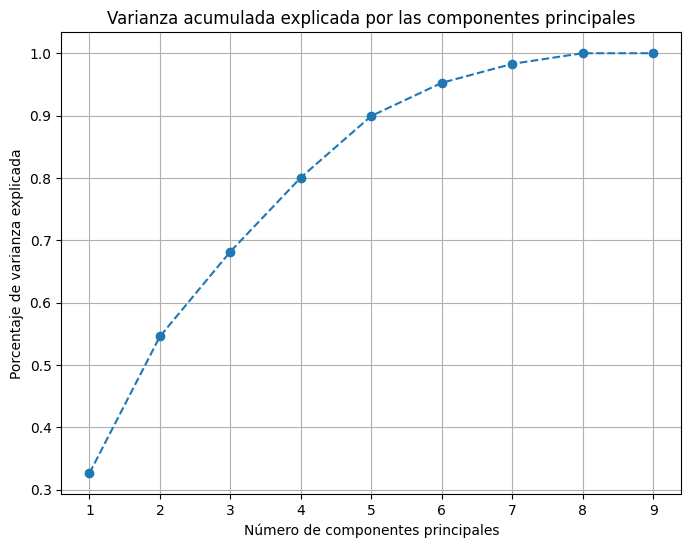

In [54]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio.cumsum(), marker='o', linestyle='--')
plt.title('Varianza acumulada explicada por las componentes principales')
plt.xlabel('Número de componentes principales')
plt.ylabel('Porcentaje de varianza explicada')
plt.grid()
plt.show()



### ¿Qué representa el gráfico?

El eje X: Representa el número de componentes principales seleccionados.

El eje Y: Muestra el porcentaje acumulado de la varianza explicada por las componentes seleccionadas.

El gráfico indica cómo las componentes principales van capturando progresivamente más información de los datos originales.

### PCA1 (Primera componente principal):

Explica aproximadamente el 32% de la varianza total (0.32 en el eje Y).
Esta es la componente que captura la mayor cantidad de información de los datos originales.


### PCA1 + PCA2 (Primeras dos componentes principales):

Juntas explican más del 50% de la varianza total.

Esto significa que estas dos componentes ya resumen una gran parte de la información.


### PCA1 + PCA2 + PCA3 (Primeras tres componentes principales):

Acumulan cerca del 70% de la varianza.
Es un buen equilibrio entre reducción de dimensionalidad y retención de información.


### PCA1 + PCA2 + PCA3 + PCA4 (Primeras cuatro componentes principales):

Explican  el 80% de la varianza total.

### PCA1 + PCA2 + PCA3 + PCA4 + PCA5 (Primeras cinco componentes principales):

Explican  casi el 90% de la varianza total.

### PCA1 + PCA2 + PCA3 + PCA4 + PCA5 + PCA6 (Primeras seis componentes principales):

Explican  mas del 95% de la varianza total.

### PCA1 + PCA2 + PCA3 + PCA4 + PCA5 + PCA6+ PCA7 (Primeras siete componentes principales):

Explican  mas del 98% de la varianza total.


A partir de este punto, las siguientes componentes (PCA8,PCA9) explican pequeñas cantidades de varianza adicional y PCA10 no da infomracion de varianza


### Componentes posteriores (PCA8 en adelante):

La curva se aplana a partir de aquí.
Esto indica que las componentes adicionales aportan muy poca información nueva, y podrían no ser necesarias para el análisis.

### ¿Cuántas componentes principales deberíamos usar?

Generalmente, elegimos el número de componentes que expliquen entre el 90% y 95% de la varianza.

En este caso, con 6 componentes principales, explicamos aproximadamente el 95% de la varianza, lo cual es suficiente para conservar la mayor parte de la información.

In [59]:
# Elegir el número de componentes principales 
pca = PCA(n_components=6)
X_pca = pca.fit_transform(X_scaled)

# Mostrar los datos comprimidos
print("\nDatos comprimidos (primeras filas):")
print(X_pca[:5])


Datos comprimidos (primeras filas):
[[ 2.03565349 -1.55957537 -2.07790571 -2.84127339 -0.6320846   0.59238583]
 [ 0.37148564  1.30982121 -0.03758632 -0.02573277 -0.57571056  0.15397123]
 [ 0.05240234  0.94515069  0.04977308 -0.03789765 -0.72325614  0.15791029]
 [ 1.65948759  0.97759947  1.18003092  0.20094839 -0.34109396 -0.9449746 ]
 [ 3.32751849 -0.70241491 -1.96086884 -2.76999885 -0.55685074 -0.20299905]]


In [60]:
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(X_pca)

# Agregar los clústeres como una nueva columna en el dataset original
df["Cluster"] = clusters

# Mostrar algunas filas con el clúster asignado
print("\nDataset con clústeres asignados:")
print(df.head())


Dataset con clústeres asignados:
     model  year  price transmission  mileage fuelType  tax   mpg  engineSize  \
0   Fiesta  2017  12000    Automatic    15944   Petrol  150  57.7         1.0   
1    Focus  2018  14000       Manual     9083   Petrol  150  57.7         1.0   
2    Focus  2017  13000       Manual    12456   Petrol  150  57.7         1.0   
3   Fiesta  2019  17500       Manual    10460   Petrol  145  40.3         1.5   
4   Fiesta  2019  16500    Automatic     1482   Petrol  145  48.7         1.0   

   Cluster  
0        2  
1        1  
2        1  
3        1  
4        2  


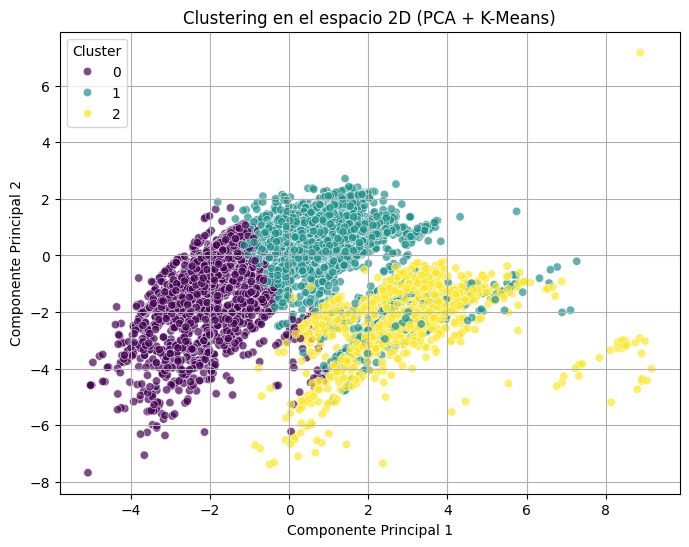

In [61]:
# Visualizar los datos comprimidos en 2D junto con los clústeres
plt.figure(figsize=(8, 6))

# Graficar los datos usando las primeras dos componentes principales
sns.scatterplot(
    x=X_pca[:, 0],  # Primera componente principal
    y=X_pca[:, 1],  # Segunda componente principal
    hue=df["Cluster"],  # Clúster asignado como color
    palette="viridis",  # Paleta de colores
    alpha=0.7  # Transparencia
)

# Etiquetas y título
plt.title("Clustering en el espacio 2D (PCA + K-Means)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Cluster")
plt.grid()
plt.show()


Los datos se agrupan en tres clústeres que  estan bien definidos, lo que indica que K-Means  ha identificado patrones en los datos.